In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load dataset

dataset = pd.read_csv("Mall_Customers.csv")

dataset.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# info
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
 X = dataset.iloc[:,[3,4]].values
print(X)


[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

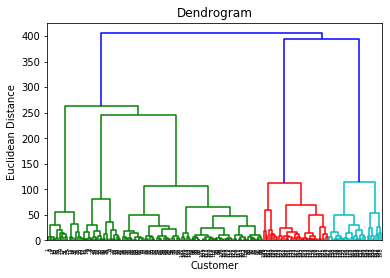

In [5]:
# using dendrogram find out NO. of clusters

import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = "ward"))
plt.title("Dendrogram")
plt.xlabel("Customer")
plt.ylabel("Euclidean Distance")
plt.show()

In [6]:
# fitting hierarchy clustering to the mall dataset

from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = "euclidean", linkage  = "ward")
y_hc = hc.fit_predict(X)

# note : linakge is method measure distance b/w newly fomed cluster,

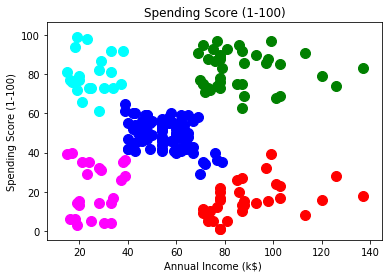

In [7]:
# visualize the Hierarchy  to mall dataset

plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = "red", label = "Careful")
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = "blue", label = "Standard")
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = "green", label = "Target")
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = "cyan", label = "Careless")
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = "magenta", label = "Sensible")
plt.title("Spending Score (1-100)")
plt.xlabel("Annual Income (k$) ")
plt.ylabel("Spending Score (1-100)")
plt.show()